In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-trending-video-dataset/MX_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/GB_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/BR_category_id.json
/kaggle/input/youtube-trending-video-dataset/FR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/MX_category_id.json
/kaggle/input/youtube-trending-video-dataset/GB_category_id.json
/kaggle/input/youtube-trending-video-dataset/US_category_id.json
/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_category_id.json
/kaggle/input/youtube-trending-video-dataset/KR_category_id.json
/kaggle/input/youtube-trending-video-dataset/DE_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_category_id.json
/kaggle/input/youtube-trend

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

In [3]:
youtube_in = pd.read_csv('/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv')
youtube_in.head(10)
youtube_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178473 entries, 0 to 178472
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           178473 non-null  object
 1   title              178473 non-null  object
 2   publishedAt        178473 non-null  object
 3   channelId          178473 non-null  object
 4   channelTitle       178472 non-null  object
 5   categoryId         178473 non-null  int64 
 6   trending_date      178473 non-null  object
 7   tags               178473 non-null  object
 8   view_count         178473 non-null  int64 
 9   likes              178473 non-null  int64 
 10  dislikes           178473 non-null  int64 
 11  comment_count      178473 non-null  int64 
 12  thumbnail_link     178473 non-null  object
 13  comments_disabled  178473 non-null  bool  
 14  ratings_disabled   178473 non-null  bool  
 15  description        161249 non-null  object
dtypes: bool(2), int64(5)

In [4]:
youtube_in['trending_date']=pd.to_datetime(youtube_in['trending_date'],infer_datetime_format=True)

youtube_in['publishedAt']=pd.to_datetime(youtube_in['publishedAt'],infer_datetime_format=True)

In [5]:
youtube_in.dropna(subset=['channelTitle'],inplace=True)

youtube_in_2022 = youtube_in.loc[youtube_in['trending_date'].dt.year==2022]

In [6]:
youtube_in_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71056 entries, 96560 to 167615
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           71056 non-null  object        
 1   title              71056 non-null  object        
 2   publishedAt        71056 non-null  datetime64[ns]
 3   channelId          71056 non-null  object        
 4   channelTitle       71056 non-null  object        
 5   categoryId         71056 non-null  int64         
 6   trending_date      71056 non-null  datetime64[ns]
 7   tags               71056 non-null  object        
 8   view_count         71056 non-null  int64         
 9   likes              71056 non-null  int64         
 10  dislikes           71056 non-null  int64         
 11  comment_count      71056 non-null  int64         
 12  thumbnail_link     71056 non-null  object        
 13  comments_disabled  71056 non-null  bool          
 14  r

In [7]:
video_views = youtube_in_2022[['video_id','channelTitle','view_count','tags']]
video_views = video_views[~video_views.duplicated()]
channel_views = video_views.groupby(['channelTitle'])['view_count'].sum().reset_index(name = 'Total Views')
channel_views_sorted = channel_views.sort_values(by="Total Views", ascending = False)
channel_views_top5 = channel_views_sorted.head()
#channel_views_top5 = channel_views_top5.sort_values(by="Total Views")
channel_views_top5.rename(columns={'channelTitle': 'Channel'},inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0.5, 1.0, 'Top Viewed Channels in 2022')]

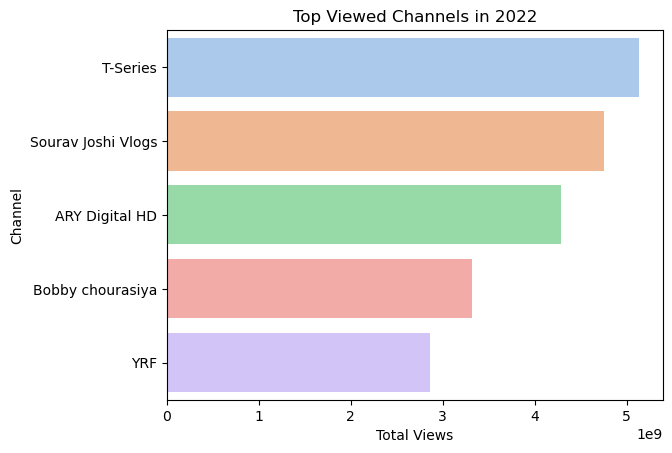

In [8]:
sns.barplot(x=channel_views_top5['Total Views'],y=channel_views_top5['Channel'],palette = 'pastel').set(title='Top Viewed Channels in 2022')


In [9]:
filtered_tags=pd.DataFrame()
filtered_tags=video_views['tags'].str.split('|',expand=True).stack()
filtered_tags=filtered_tags.to_frame()
filtered_tags.columns = ['Tag']
Tags = filtered_tags.groupby(["Tag"]).size().reset_index(name = "Number of Videos")
Tags = Tags[Tags.Tag != "[None]"]
Tags_sorted = Tags.sort_values(by="Number of Videos", ascending = False)
Tags_top10 = Tags_sorted.head(10)
Tags_top10 = Tags_top10.sort_values(by="Number of Videos")
fig2 = px.bar(Tags_top10,x = "Number of Videos", y = "Tag",title = "Top 10 trending tags in India 2022")
fig2.show()

In [10]:
print('Data from',youtube_in_2022['trending_date'].min(),'to',youtube_in_2022['trending_date'].max())

Data from 2022-01-01 00:00:00 to 2022-12-31 00:00:00


In [11]:
youtube_in_2022['trending_day']=youtube_in_2022['trending_date'].dt.day
youtube_in_2022['trending_month']=youtube_in_2022['trending_date'].dt.month
youtube_in_2022['trending_year']=youtube_in_2022['trending_date'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [12]:
youtube_cat_in=pd.read_json('/kaggle/input/youtube-trending-video-dataset/IN_category_id.json')
youtube_cat_in.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."


In [13]:
id=[]
cat=[]
for t in youtube_cat_in['items']:
    for x,y in t.items():
        if(x=='id'):
            id.append(y)
        if(x=='snippet'):
            for a,b in y.items():
                if (a=='title'):
                    cat.append(b)
                    break
                    
cat_dict = {
    'id': id,
    'category':cat
}

category_india = pd.DataFrame(cat_dict)
                
            

In [14]:
category_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        31 non-null     object
 1   category  31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [15]:
category_india['id']=category_india['id'].astype('int64')
category_india

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


[Text(0.5, 1.0, 'Most trending categories 2022')]

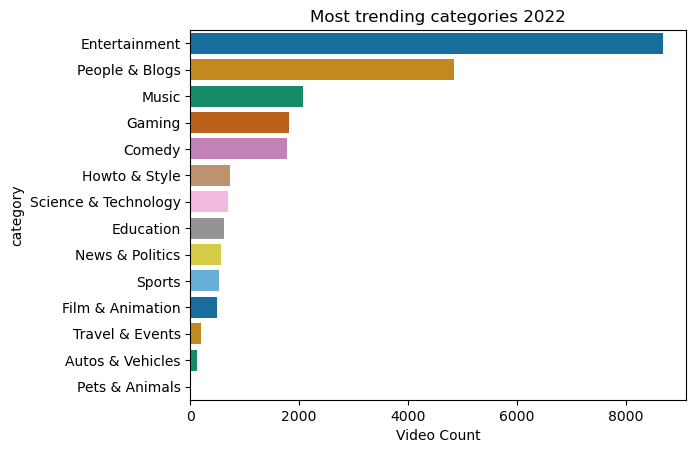

In [16]:
trending=youtube_in_2022[['video_id','categoryId']]
trending_2022=pd.DataFrame(trending.groupby("categoryId").video_id.nunique().sort_values(ascending=False)).merge(category_india,how='inner',left_on='categoryId',right_on='id').rename(columns={'video_id':'Video Count'})
sns.barplot(x=trending_2022['Video Count'],y=trending_2022['category'],palette='colorblind').set(title='Most trending categories 2022')

[Text(0.5, 1.0, 'Top 5 trending channels 2022')]

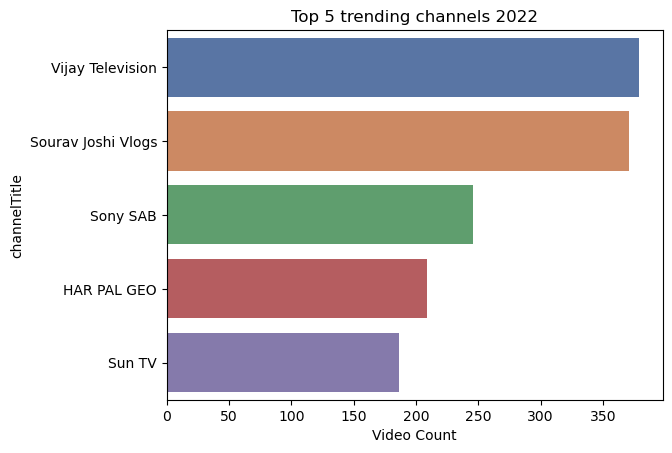

In [17]:
most_trending_channels5 = pd.DataFrame(youtube_in_2022.groupby('channelTitle').video_id.nunique().sort_values(ascending=False)).rename(columns={'video_id':'Video Count'}).head()
sns.barplot(x=most_trending_channels5['Video Count'],y=most_trending_channels5.index,palette='deep').set(title='Top 5 trending channels 2022')


In [18]:
youtube_in_2022.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,trending_day,trending_month,trending_year
96560,lwLSb1cq4gM,Pellam Vaddu Party Muddu | Extra Jabardasth|ET...,2021-12-31 19:35:14,UCnoqvTW4YZExfDeq7_Wmd-w,ETV Jabardasth,23,2022-01-01,pellam vaddu party muddu|pellam vaddu party mu...,2840348,63462,0,5190,https://i.ytimg.com/vi/lwLSb1cq4gM/default.jpg,False,False,#rgv #extrajabardasth #pellamvaddupartymuddu #...,1,1,2022
96561,Af0MJxJIAj8,Bacchi ne sahi kiya ya galat? #shorts #ytshort...,2021-12-30 06:29:27,UCoxEmfaNM9eCqIER5KnjPxg,shadab5star,24,2022-01-01,[None],15284620,1306973,0,4106,https://i.ytimg.com/vi/Af0MJxJIAj8/default.jpg,False,False,NaN,1,1,2022
96562,4XmgqWXBnRA,Glimpse of LIGER | Vijay Deverakonda | Puri Ja...,2021-12-31 04:33:03,UCKQKIY2YlI4L5QVg7hhfjrQ,Dharma Productions,1,2022-01-01,[None],16954791,441028,0,13424,https://i.ytimg.com/vi/4XmgqWXBnRA/default.jpg,False,False,Vaat laga denge!⚡Presenting to you the most aw...,1,1,2022
96563,IIAq4rrV7hE,BUYING THE MOST EXPENSIVE HOUSE | GTA V GAMEPL...,2021-12-31 04:34:18,UCX8pnu3DYUnx8qy8V_c6oHg,Techno Gamerz,20,2022-01-01,GTA|GTA 5|GTA ONLINE|PC|gta 5 gameplay|gta v h...,8492797,999836,0,100720,https://i.ytimg.com/vi/IIAq4rrV7hE/default.jpg,False,False,BUYING THE MOST EXPENSIVE HOUSE | GTA V GAMEPL...,1,1,2022
96564,0K5Qx6dcC5E,Dhamaka 😱 Experiment BY @The Experiment TV @MR...,2021-12-30 02:30:00,UCwVRB04LYKsMeGmPK77fJ0w,Sab Milega Yaha,22,2022-01-01,Best Experiments In India|Crazy XYZ|Dhamaka|Ex...,7669326,610128,0,722,https://i.ytimg.com/vi/0K5Qx6dcC5E/default.jpg,False,False,Dhamaka 😱 Experiment BY @The Experiment TV @MR...,1,1,2022


In [19]:
monthly_trend_channel = pd.DataFrame(youtube_in_2022.groupby(['trending_month','channelTitle']).video_id.nunique().sort_values(ascending=False)).rename(columns={'video_id':'Video Count'})
monthly_trend_channel = monthly_trend_channel.reset_index()

In [20]:
month = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May",6 :"June",7 :"July",8 :"August", 9:"September", 10:"October", 11:"November", 12:"December"}
print('Monthly Top 3 trending channels\n')

for m in range(1,13):
    print(month[m])
    print(monthly_trend_channel[['channelTitle','Video Count']].loc[monthly_trend_channel.trending_month==m].head(3))
    print('\n')

Monthly Top 3 trending channels

January
          channelTitle  Video Count
4     Vijay Television           51
16            Sony SAB           35
17  Sourav Joshi Vlogs           34


February
            channelTitle  Video Count
20             SEVENGERS           34
32    Sourav Joshi Vlogs           31
39  Pragati Verma Shorts           27


March
          channelTitle  Video Count
13    Vijay Television           36
14           SEVENGERS           35
26  Sourav Joshi Vlogs           33


April
          channelTitle  Video Count
28  Sourav Joshi Vlogs           32
37              HUM TV           28
38    Vijay Television           28


May
          channelTitle  Video Count
23  Sourav Joshi Vlogs           33
42            Sony SAB           25
54    Vijay Television           22


June
          channelTitle  Video Count
27  Sourav Joshi Vlogs           32
53      ARY Digital HD           22
66            Sony SAB           19


July
          channelTitle  Video Count
25  

[Text(0.5, 1.0, 'Time taken to become trending-Category')]

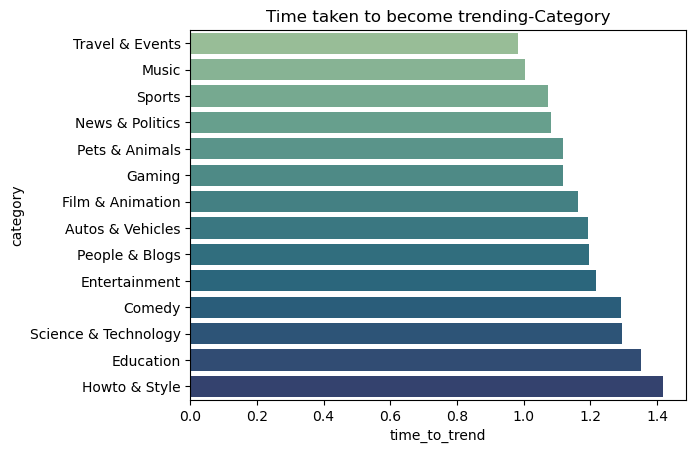

In [21]:
#how many days after publishing video goes to trending(cat)
df1=youtube_in_2022[['video_id','publishedAt','channelTitle','categoryId']]
df1=df1[~df1.duplicated()]
df2=youtube_in_2022['trending_date']
df1=df1.join(df2)
df1=df1.join([df1['trending_date'].dt.date-df1['publishedAt'].dt.date])
df1.rename(columns={0:'time_to_trend'},inplace = True)

cat_trending_time=pd.DataFrame(df1.groupby(by='categoryId').time_to_trend.mean().sort_values()).merge(category_india,how='left',left_on='categoryId',right_on='id').dropna()
sns.barplot(x=cat_trending_time['time_to_trend']/np.timedelta64(1, 'D'),y=cat_trending_time['category'],palette='crest').set(title="Time taken to become trending-Category")

In [22]:
print("Top 10 Channels with least time to become trending\n")
print(df1.groupby(by='channelTitle').time_to_trend.mean().sort_values().reset_index(name='Time Taken').head(10))

Top 10 Channels with least time to become trending

        channelTitle Time Taken
0       Film Faktory     0 days
1      Mrs. Abi Time     0 days
2    Good News Today     0 days
3  bhura_turkish_755     0 days
4     My Smart Guide     0 days
5     Koilamma Vlogs     0 days
6      The Gebonions     0 days
7         AHAD GAMER     0 days
8         Mahaa News     0 days
9      Green Life Tv     0 days


[Text(0.5, 1.0, 'Time spent in trending - Category')]

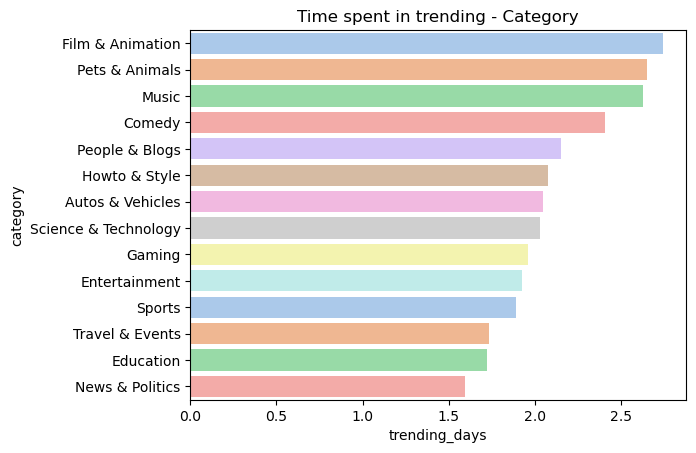

In [23]:
df2=youtube_in_2022.groupby(['video_id','channelTitle','categoryId']).apply(lambda x:max(x.trending_date)-min(x.trending_date)).reset_index(name="trending_days")
cat_trending_days=pd.DataFrame(df2.groupby(['categoryId']).trending_days.mean().sort_values(ascending=False)).merge(category_india,how='left',left_on='categoryId',right_on='id')
sns.barplot(x=cat_trending_days['trending_days']/np.timedelta64(1, 'D'),y=cat_trending_days['category'],palette='pastel').set(title="Time spent in trending - Category")

In [24]:
df2.head()

,video_id,channelTitle,categoryId,trending_days
0,--9rRxqTdjQ,Gaurav Chaudhary,22,3 days
1,--gbWcfoRWg,Pramod`s Life,2,2 days
2,--vmXGvtqxQ,Anil Kumar Masani,22,3 days
3,-08TpBV_9Ak,Saba Ibrahim,22,1 days
4,-0JpgS_nzAg,Sourav Joshi Vlogs,22,2 days


[Text(0.5, 1.0, 'Time spent in Trending - Channel')]

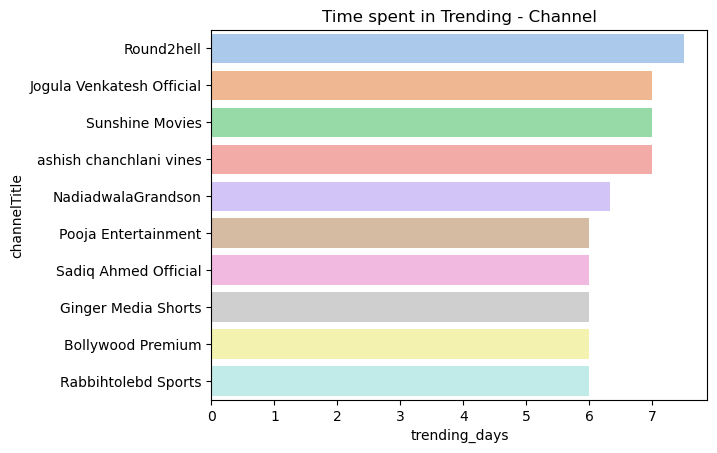

In [25]:
top10_trendingduration_channels=pd.DataFrame(df2.groupby(['channelTitle']).trending_days.mean().sort_values(ascending=False)).reset_index().head(10)
sns.barplot(x=top10_trendingduration_channels['trending_days']/np.timedelta64(1, 'D'),y=top10_trendingduration_channels['channelTitle'],palette='pastel').set(title = "Time spent in Trending - Channel")